## Musculoskeletal Disorders risk in students

### Load the dataset and explore the first few rows 

In [75]:
import pandas as pd 

file_path='msd_risk_dataset.xlsx'
data = pd.read_excel(file_path)
csv_file_path ='msd_risk_dataset.csv'

data.to_csv(csv_file_path, index = False)

print(f"File successfully converted to {csv_file_path}")

data = pd.read_csv('msd_risk_dataset.csv', encoding='utf-8')

pd.set_option('display.max_columns', None)

print("Dataset Information:")
print(data.info())
print(data.head(10)) 

File successfully converted to msd_risk_dataset.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   msd_risk                  10000 non-null  object 
 1   Cervical Deviation        10000 non-null  float64
 2   Thoracic Deviation        10000 non-null  float64
 3   Lumbar Deviation          10000 non-null  float64
 4   Pelvic Tilt Deviation     10000 non-null  float64
 5   Craniovertebral Angle     10000 non-null  float64
 6   Shoulder Level Deviation  10000 non-null  float64
 7   Backpack Height           10000 non-null  object 
 8   Backpack Weight           10000 non-null  float64
 9   Child’s Age               10000 non-null  int64  
 10  Child’s Weight            10000 non-null  float64
 11  Child’s Height            10000 non-null  float64
 12  Gender                    10000 non-null  ob

# Check for missing values 

In [76]:
print(data.isnull().sum())

msd_risk                    0
Cervical Deviation          0
Thoracic Deviation          0
Lumbar Deviation            0
Pelvic Tilt Deviation       0
Craniovertebral Angle       0
Shoulder Level Deviation    0
Backpack Height             0
Backpack Weight             0
Child’s Age                 0
Child’s Weight              0
Child’s Height              0
Gender                      0
dtype: int64


# Map categorical values 

In [77]:
# Map 'msd_risk' values to 1, 2, 3
data['msd_risk'] = data['msd_risk'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Backpack Height'] = data['Backpack Height'].map({'Slightly Lower': 1, 'On Buttocks': 2, 'Shoulder Blades to Lower Back': 3})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})
# Verify the change
print(data.head(10))


   msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0         1            6.664560           17.385710          4.127822   
1         3            1.868204            3.316403          4.127822   
2         3           11.761539            7.410447         16.869219   
3         2            1.868204            3.316403         16.869219   
4         1            6.664560            3.316403          7.034855   
5         1            6.664560            3.316403          4.127822   
6         1            6.664560            3.316403         16.869219   
7         3           11.761539            3.316403          4.127822   
8         2            6.664560            3.316403          4.127822   
9         3           11.761539           17.385710          7.034855   

   Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
0               9.536482               8.138638                  1.988979   
1              15.531397               3.3

# Get summary statistics for numerical features

In [78]:
print(data.describe())

          msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
count  10000.00000        10000.000000        10000.000000      10000.000000   
mean       1.88290            5.333774            7.329988          7.534957   
std        0.82514            3.855522            5.278391          4.817546   
min        1.00000            1.868204            3.316403          4.127822   
25%        1.00000            1.868204            3.316403          4.127822   
50%        2.00000            6.664560            7.410447          4.127822   
75%        3.00000            6.664560            7.410447          7.034855   
max        3.00000           11.761539           17.385710         16.869219   

       Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
count           10000.000000           10000.000000              10000.000000   
mean                6.679280               6.378510                  5.707549   
std                 5.593334        

# Visualize Feature Distributions with Histograms

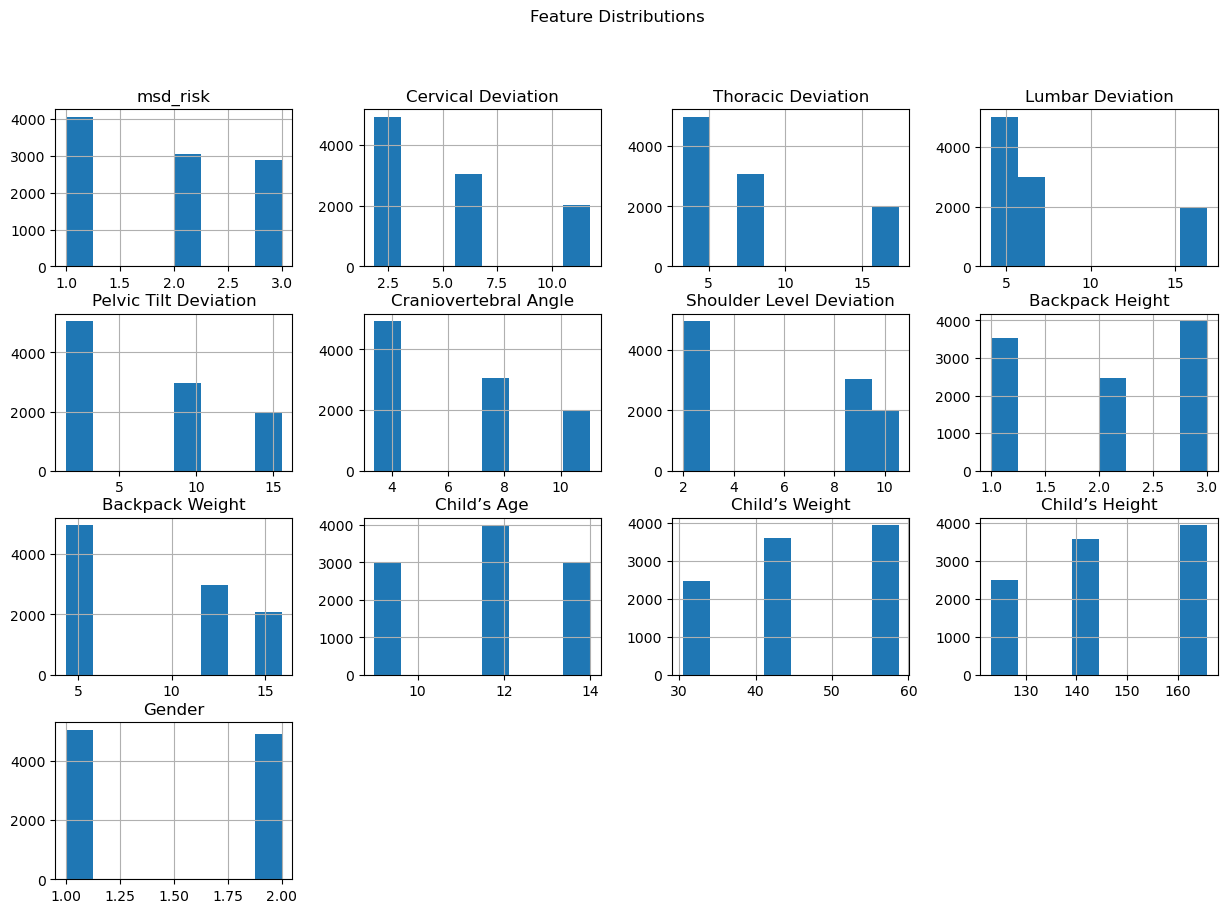

In [79]:
import matplotlib.pyplot as plt
data.hist(bins=8, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Check for Correlation

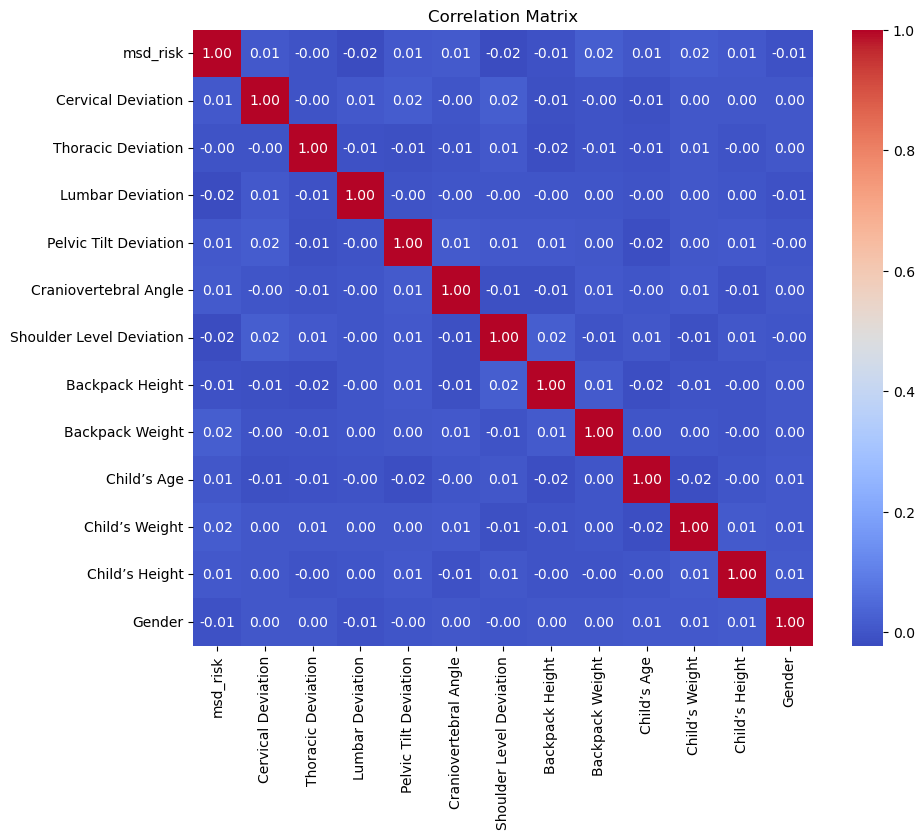

In [80]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pair Plot

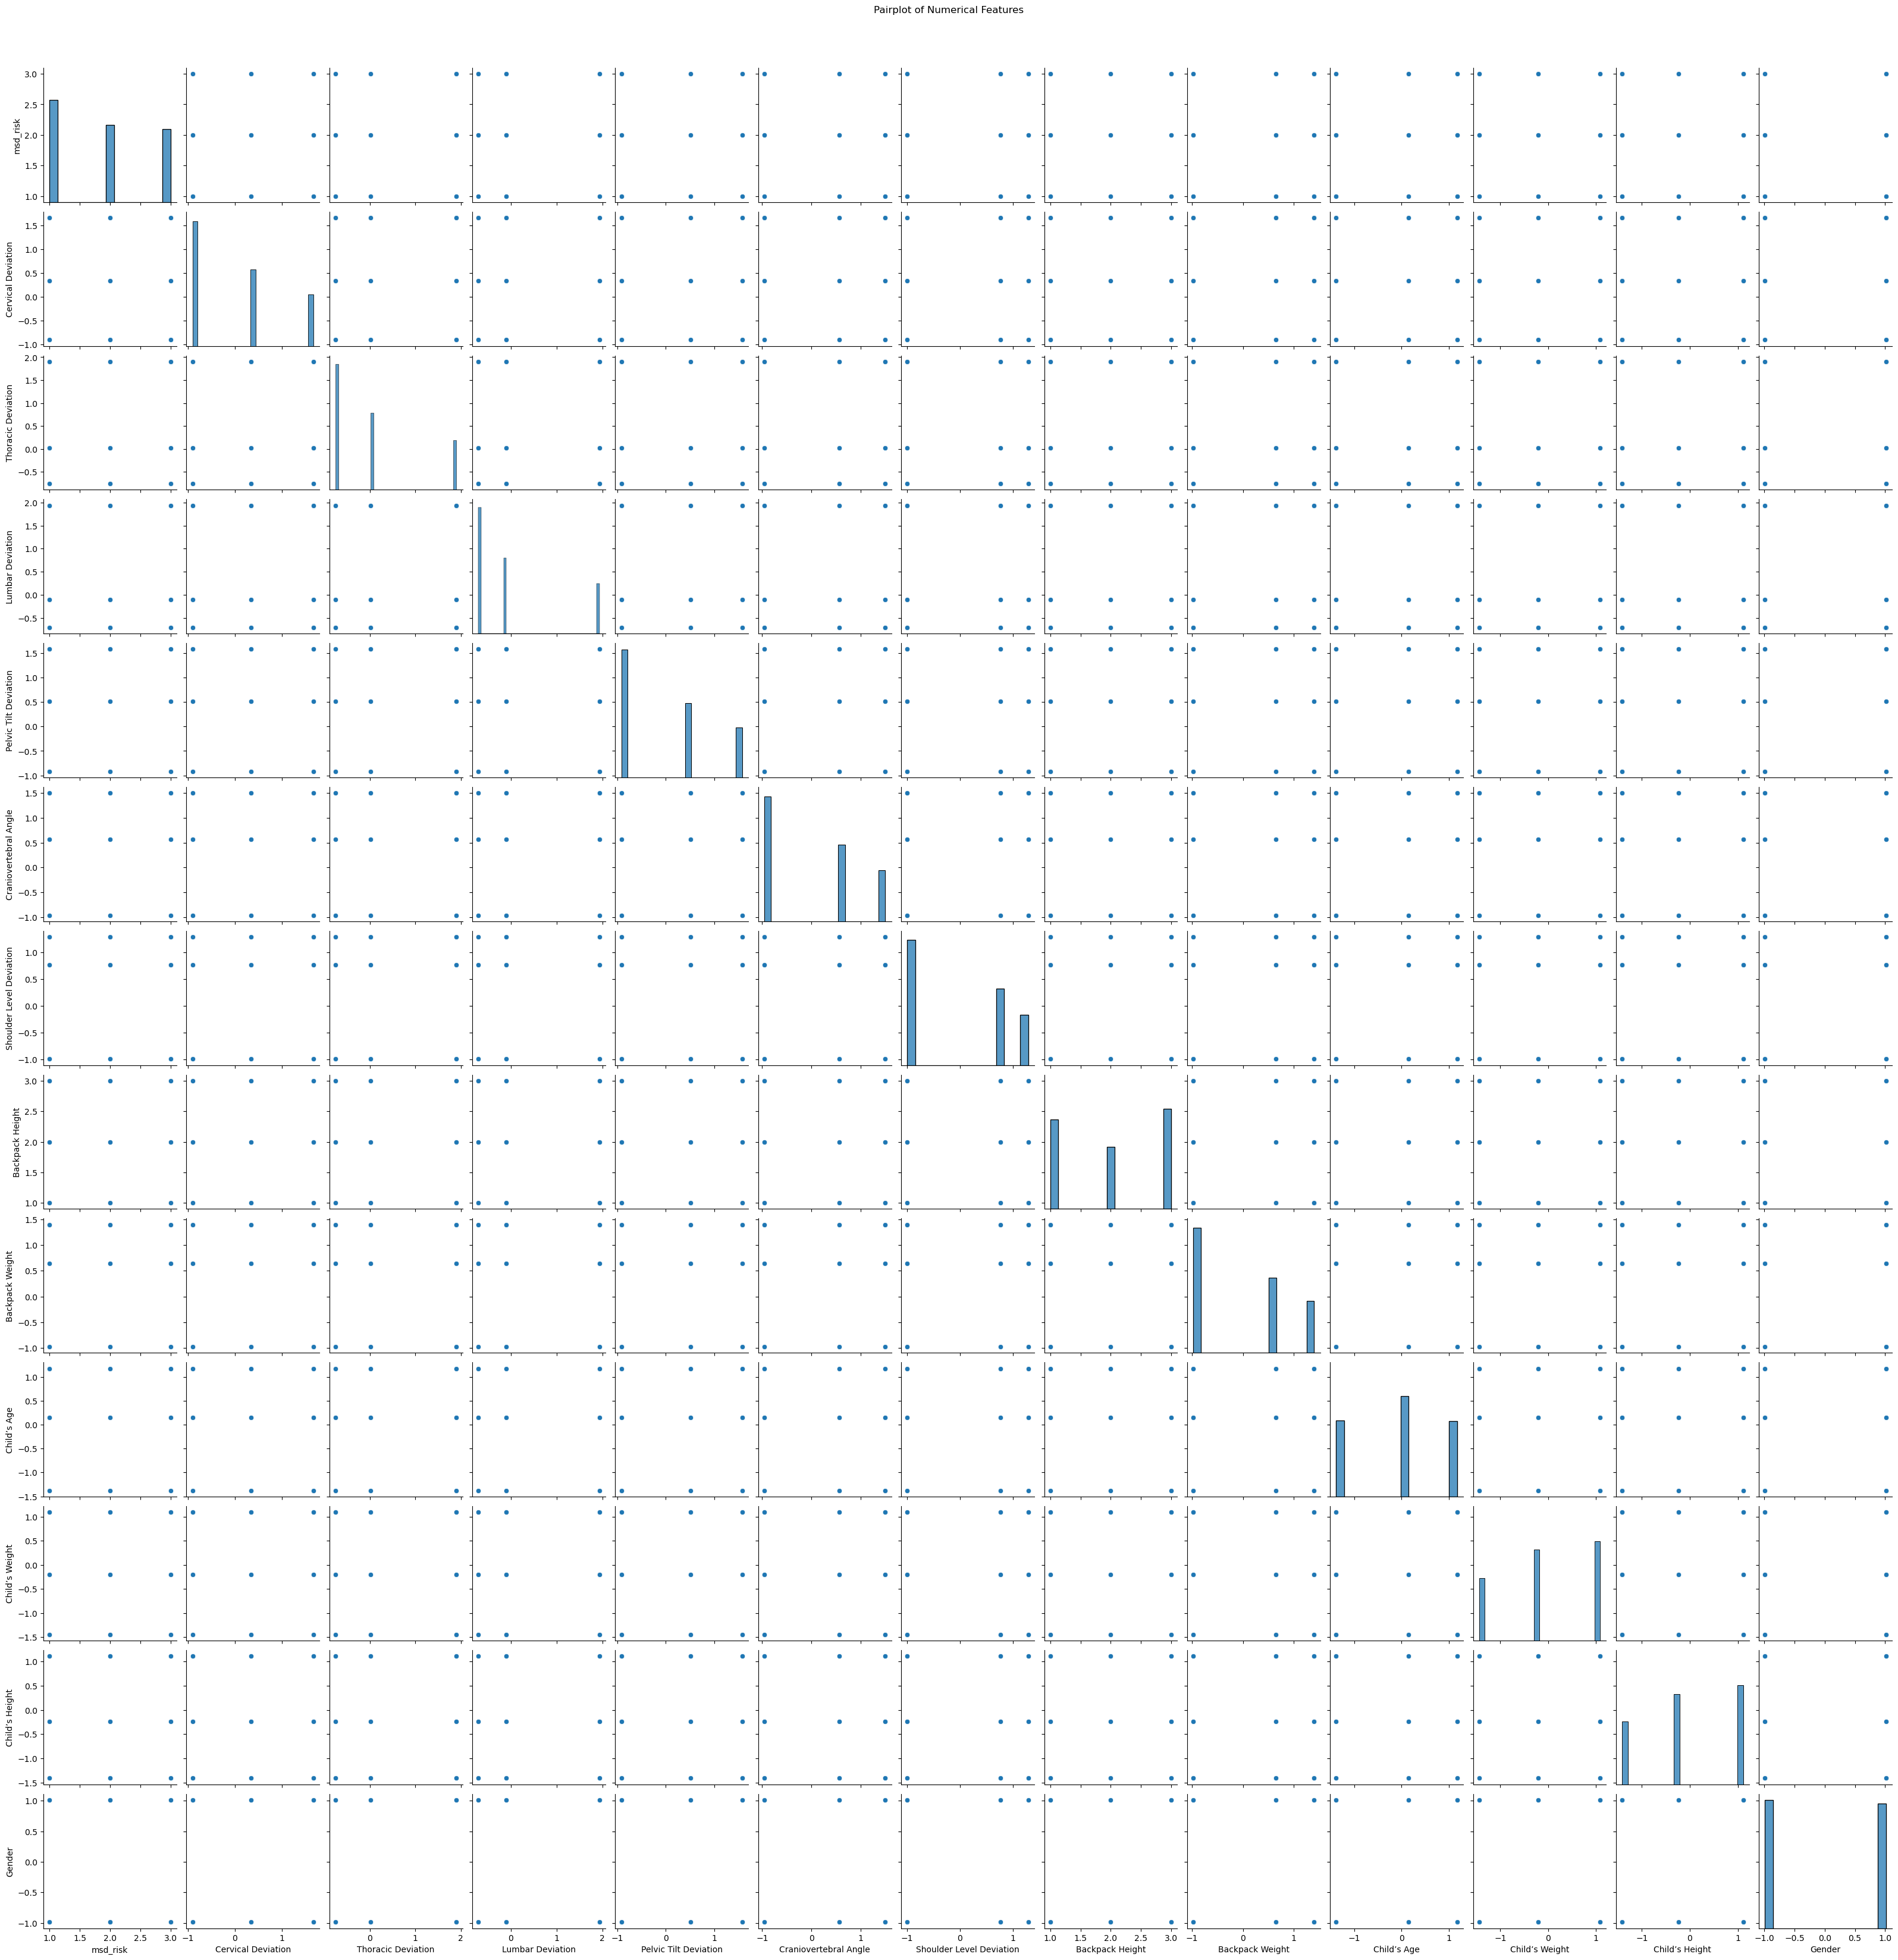

In [82]:
# Pairplot for numerical features to check for relationships
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


# Standardizing the Numeric Data

In [81]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select numerical columns for standardization excluding 'msd_risk', 'age', and 'Backpack Height'
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
columns_to_exclude = ['msd_risk', 'age', 'Backpack Height']
columns_to_scale = [col for col in numerical_columns if col not in columns_to_exclude]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns that do not include the excluded columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows to verify the standardization
print(data.head())


   msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0         1            0.345181            1.905169         -0.707270   
1         3           -0.898904           -0.760418         -0.707270   
2         3            1.667242            0.015244          1.937652   
3         2           -0.898904           -0.760418          1.937652   
4         1            0.345181           -0.760418         -0.103814   

   Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
0               0.510848               0.564152                 -0.990858   
1               1.582698              -0.957809                 -0.990858   
2              -0.918082               0.564152                 -0.990858   
3              -0.918082               0.564152                 -0.990858   
4              -0.918082              -0.957809                 -0.990858   

   Backpack Height  Backpack Weight  Child’s Age  Child’s Weight  \
0                1        -0.9

# Define features (X) and target (y)

In [86]:

X = data.drop(columns=['msd_risk'])  # All columns except the target
y = data['msd_risk']  # The target column


# Split the data into training and testing sets (80% train, 20% test)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8000
Test set size: 2000


# Save X_train, X_test, y_train, and y_test as CSV files

In [88]:

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data saved as CSV files!")


Data saved as CSV files!


In [89]:
print(data.head(7))

   msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0         1            0.345181            1.905169         -0.707270   
1         3           -0.898904           -0.760418         -0.707270   
2         3            1.667242            0.015244          1.937652   
3         2           -0.898904           -0.760418          1.937652   
4         1            0.345181           -0.760418         -0.103814   
5         1            0.345181           -0.760418         -0.707270   
6         1            0.345181           -0.760418          1.937652   

   Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
0               0.510848               0.564152                 -0.990858   
1               1.582698              -0.957809                 -0.990858   
2              -0.918082               0.564152                 -0.990858   
3              -0.918082               0.564152                 -0.990858   
4              -0.918082      

# the model traning

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Verify that the model has been trained
print("Model trained successfully!")


Model trained successfully!


# the evaluation

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import numpy as np
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Accuracy: 0.347
Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.52      0.45       802
           2       0.30      0.26      0.28       604
           3       0.28      0.20      0.24       594

    accuracy                           0.35      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.35      0.33      2000

Mean Absolute Error (MAE): 0.8985
Root Mean Squared Error (RMSE): 1.1787705459503135
